In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("AB_NYC_2019.csv", on_bad_lines='skip')
print("✅ Dataset Loaded Successfully After Skipping Bad Lines")
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)


✅ Dataset Loaded Successfully After Skipping Bad Lines
Dataset Shape: (90399, 16)

Column Names:
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


/tmp/ipython-input-704266403.py:1: DtypeWarning: Columns (0,2,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AB_NYC_2019.csv", on_bad_lines='skip')


In [ ]:
df = pd.read_csv("AB_NYC_2019.csv", on_bad_lines='skip')

# Check overall data structure
print("✅ Dataset Loaded Successfully!")
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Neighbourhood Groups:", df['neighbourhood_group'].unique())
print("Unique Room Types:", df['room_type'].unique())
print("\nSummary Statistics:\n")
print(df.describe())

✅ Dataset Loaded Successfully!
Dataset Shape: (90399, 16)

Column Data Types:
 id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                          object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                  object
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

Missing Values:
 id                                    0
name                                 25
host_id                               0
host_name                            37
neighbourhood_group                   0
neighbourhood    

/tmp/ipython-input-1302571838.py:1: DtypeWarning: Columns (0,2,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AB_NYC_2019.csv", on_bad_lines='skip')


In [ ]:
# ---  Missing Data Handling ---

print("Missing Values Before Handling:\n")
print(df.isnull().sum())
df['name'].fillna("No Name", inplace=True)
df['host_name'].fillna("Unknown", inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df['last_review'].fillna("No Review", inplace=True)
print("\nMissing Values After Handling:\n")
print(df.isnull().sum())


Missing Values Before Handling:

id                                    0
name                                 25
host_id                               0
host_name                            37
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     4
last_review                       19282
reviews_per_month                 19280
calculated_host_listings_count        2
availability_365                      5
dtype: int64

Missing Values After Handling:

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                    

/tmp/ipython-input-2941915813.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna("No Name", inplace=True)
/tmp/ipython-input-2941915813.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
# --- Duplicate Removal ---

# Count duplicate rows
print("Duplicate Rows Before Removal:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicate Rows After Removal:", df.duplicated().sum())
print("Dataset Shape After Removing Duplicates:", df.shape)


Duplicate Rows Before Removal: 16589
Duplicate Rows After Removal: 0
Dataset Shape After Removing Duplicates: (73810, 16)


In [ ]:
# ---  Standardization ---

# Convert categorical columns to lowercase for consistency
df['neighbourhood_group'] = df['neighbourhood_group'].str.lower()
df['neighbourhood'] = df['neighbourhood'].str.lower()
df['room_type'] = df['room_type'].str.lower()
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
print("\nStandardized Column Samples:")
print(df[['neighbourhood_group', 'neighbourhood', 'room_type']].head())
print("\nData Types After Standardization:\n", df.dtypes)



Standardized Column Samples:
  neighbourhood_group neighbourhood        room_type
0            brooklyn    kensington     private room
1           manhattan       midtown  entire home/apt
2           manhattan        harlem     private room
3            brooklyn  clinton hill  entire home/apt
4           manhattan   east harlem  entire home/apt

Data Types After Standardization:
 id                                        object
name                                      object
host_id                                   object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                 object
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                         object
last_review                 

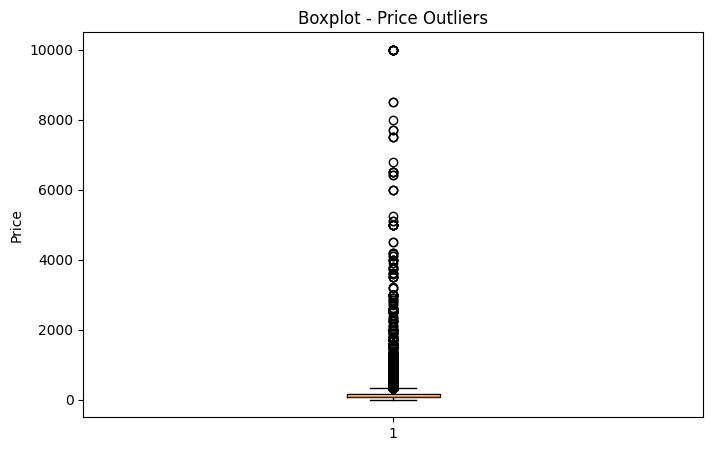

Dataset Shape After Outlier Removal: (73455, 16)
Price Summary After Cleaning:
 count    73455.000000
mean       139.610238
std        116.340658
min          0.000000
25%         66.000000
50%        100.000000
75%        175.000000
max       1000.000000
Name: price, dtype: float64


In [ ]:
# ---  Outlier Detection ---

# Detect potential outliers in 'price'
plt.figure(figsize=(8, 5))
plt.boxplot(df['price'])
plt.title("Boxplot - Price Outliers")
plt.ylabel("Price")
plt.show()
df = df[df['price'] <= 1000]
print("Dataset Shape After Outlier Removal:", df.shape)
print("Price Summary After Cleaning:\n", df['price'].describe())
